# ABSTRACT

# OVERVIEW

# BUSINESS PROBLEM

# IMPORTS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# from jupyterthemes import jtplot
# jtplot.reset()
# plt.style.use('ggplot')
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks='True', grid='False')

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.dummy import DummyClassifier

In [4]:
from sklearn import metrics

In [5]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
from imblearn.over_sampling import SMOTENC

In [9]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier, XGBRFClassifier

In [10]:
from sklearn.svm import SVC

In [11]:
from sklearn.preprocessing import OrdinalEncoder

In [12]:
from IPython.display import display, HTML, Markdown

# OBTAIN

In [13]:
raw_df = pd.read_csv('./data/BankChurners.csv')

In [14]:
raw_df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [15]:
raw_df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [16]:
raw_df.drop(columns=[
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
],
        inplace=True)
raw_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [17]:
raw_df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [18]:
raw_df['Income_Category'].apply(lambda x: x.replace("$", "")).apply(
    lambda x: x.replace(" - ", "_to_")).apply(
        lambda x: x.replace("120K +", "Above 120K")).apply(lambda x: x.replace(
            "Less than 40K", "Less_than_40K")).value_counts()

Less_than_40K    3561
40K_to_60K       1790
80K_to_120K      1535
60K_to_80K       1402
Unknown          1112
Above 120K        727
Name: Income_Category, dtype: int64

In [19]:
raw_df['Income_Category'] = raw_df['Income_Category'].apply(
    lambda x: x.replace("$", "")).apply(
        lambda x: x.replace(" - ", "_to_")).apply(
            lambda x: x.replace("120K +", "Above_120K")).apply(
                lambda x: x.replace("Less than 40K", "Less_than_40K"))
raw_df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,60K_to_80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less_than_40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,80K_to_120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less_than_40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,60K_to_80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,40K_to_60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,40K_to_60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less_than_40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,40K_to_60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [20]:
(raw_df.Attrition_Flag.value_counts(1)*100).round(2)

Existing Customer    83.93
Attrited Customer    16.07
Name: Attrition_Flag, dtype: float64

In [21]:
df = raw_df.copy()
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,60K_to_80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less_than_40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,80K_to_120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less_than_40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,60K_to_80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,40K_to_60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,40K_to_60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less_than_40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,40K_to_60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [22]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [23]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.33,8.02,26.0,41.00,46.00,52.00,73.00
Dependent_count,10127.0,2.35,1.30,0.0,1.00,2.00,3.00,5.00
Months_on_book,10127.0,35.93,7.99,13.0,31.00,36.00,40.00,56.00
Total_Relationship_Count,10127.0,3.81,1.55,1.0,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10127.0,2.34,1.01,0.0,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10127.0,2.46,1.11,0.0,2.00,2.00,3.00,6.00
Credit_Limit,10127.0,8631.95,9088.78,1438.3,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,10127.0,1162.81,814.99,0.0,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,10127.0,7469.14,9090.69,3.0,1324.50,3474.00,9859.00,34516.00
Total_Amt_Chng_Q4_Q1,10127.0,0.76,0.22,0.0,0.63,0.74,0.86,3.40


# EDA

In [24]:
print(f'Minimum customer age: {df.Customer_Age.unique().min()}')
print(f'Maximum customer age: {df.Customer_Age.unique().max()}')

Minimum customer age: 26
Maximum customer age: 73


# SCRUB

In [25]:
(df.Attrition_Flag.value_counts(1)*100).round(2)

Existing Customer    83.93
Attrited Customer    16.07
Name: Attrition_Flag, dtype: float64

## Train-Test split

In [26]:
X = df.drop(columns='Attrition_Flag').copy()
y = df.Attrition_Flag.copy()

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

## Encoding

### Label Encoding

In [28]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train_encoded = label_encoder.transform(y_train)
# y_train_encoded

In [29]:
label_encoder = LabelEncoder()
label_encoder.fit(y_test)
y_test_encoded = label_encoder.transform(y_test)
# y_test_encoded

### Feature Encoding

In [30]:
nume_col = list(X.select_dtypes('number').columns)

In [31]:
cate_col = list(X.select_dtypes('object').columns)

In [32]:
# scaler = StandardScaler()

In [33]:
# pipeline for processing categorical features
pipe_cate = Pipeline([('ohe', OneHotEncoder(sparse=False, drop=None))])
# pipeline for processing numerical features
pipe_nume = Pipeline([('scaler', StandardScaler())])
preprocessor = ColumnTransformer([('nume_feat', pipe_nume, nume_col),
                                  ('cate_feat', pipe_cate, cate_col)])

In [34]:
X_train_pr = pd.DataFrame(preprocessor.fit_transform(X_train),
                          columns=nume_col +
                          list(preprocessor.named_transformers_['cate_feat'].
                               named_steps['ohe'].get_feature_names(cate_col)))

In [35]:
X_test_pr = pd.DataFrame(preprocessor.fit_transform(X_test),
                         columns=nume_col +
                         list(preprocessor.named_transformers_['cate_feat'].
                              named_steps['ohe'].get_feature_names(cate_col)))

## SMOTENC

In [36]:
X_train_pr

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_40K_to_60K,Income_Category_60K_to_80K,Income_Category_80K_to_120K,Income_Category_Above_120K,Income_Category_Less_than_40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.459518,-0.254134,-0.484866,-0.515890,0.651219,1.403557,-0.631589,1.151203,-0.734722,0.436668,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-1.531019,-0.254134,0.014184,0.771809,-1.328340,0.493649,-0.644948,0.916424,-0.726997,-0.725187,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.411342,0.517507,0.263710,-0.515890,0.651219,0.493649,-0.167919,-1.435058,-0.039020,-1.061631,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.210701,-1.025774,1.012286,1.415659,-1.328340,0.493649,-0.628057,-1.435058,-0.498995,0.145083,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.335109,0.517507,0.637998,0.127959,-1.328340,-0.416260,2.860513,-1.435058,2.988344,-1.169293,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8096,1.330377,-1.025774,1.511336,-0.515890,-1.328340,-0.416260,-0.559279,-1.435058,-0.430242,0.095738,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8097,0.086292,-1.025774,0.014184,0.771809,-1.328340,-2.236077,1.882499,1.288875,1.766120,0.432182,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8098,0.957152,1.289147,0.887523,-0.515890,-0.338561,0.493649,-0.529913,-0.425876,-0.491491,0.212372,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8099,-1.406610,-0.254134,0.014184,0.771809,0.651219,1.403557,-0.718141,-0.267307,-0.693889,0.019477,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [37]:
smotenc_features = [False] * len(nume_col) + [True] * (
    len(X_train_pr.columns) - len(nume_col))
smotenc_features

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [38]:
oversampling = SMOTENC(categorical_features=smotenc_features, n_jobs=-1)

In [39]:
X_train_pr_os, y_train_encoded_os = oversampling.fit_sample(
    X_train_pr, y_train_encoded)

# MODEL

In [40]:
def model_report(model,
                 X_train,
                 y_train,
                 X_test,
                 y_test,
                 show_train_report=True,
                 show_test_report=True,
                 fitted_model=False,
                 cmap=['cool', 'copper_r'],
                 normalize='true',
                 figsize=(15, 5)):
    """
    Dispalys model report.
    """
    if fitted_model is False:
        model.fit(X_train, y_train)
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)

    def str_model_(model):
        """Helper function to get model class display statement, this text conversion breaks code if 
        performed in ``model_report`` function's local space. This function is to isolate from the 
        previous function's local space."""
        str_model = str(model.__class__).split('.')[-1][:-2]
        display(
            HTML(
                f"""<strong>Report of {str_model} type model using train-test split dataset.</strong>"""
            ))

    str_model_(model)
    print(f"{'*'*90}")
    print(f"""Train accuracy score: {train.round(4)}""")
    print(f"""Test accuracy score: {test.round(4)}""")
    if abs(train - test) <= .05:
        print(
            f"    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold."
        )
    elif (train - test) > .05:
        print(
            f"    Possible Overfitting, diffrence of scores {round(abs(train-test)*100,2)}% crossed 5% thresh hold."
        )
    elif (train - test) < -.05:
        print(
            f"    Possible Underfitting, diffrence of scores {round(abs(train-test)*100,2)}% crossed 5% thresh hold."
        )
    print(f"{'*'*90}")
    print("")

    if show_train_report:
        print(f'Train Report: ')
        print(f"{'*'*60}")
        # train report
        # classification report
        print(
            metrics.classification_report(y_train,
                                          model.predict(X_train)))
        print(f"{'*'*60}")
        # Confusion matrix
        fig, ax = plt.subplots(ncols=2, figsize=figsize)
        metrics.plot_confusion_matrix(model,
                                      X_train,
                                      y_train,
                                      cmap='cool',
                                      normalize='true',
                                      ax=ax[0])
        ax[0].title.set_text('Confusion Matrix')
        # ROC curve
        metrics.plot_roc_curve(model,
                               X_train,
                               y_train,
                               color='#0450E7',
                               ax=ax[1])
        ax[1].plot([0, 1], [0, 1], ls='-.', color='white')
        ax[1].title.set_text('ROC Curve')
        plt.grid()
        plt.tight_layout()
        plt.show()

    if show_test_report:
        # train report
        # classification report
        print(f'Test Report: ')
        print(f"{'*'*60}")
        print(metrics.classification_report(y_test,
                                            model.predict(X_test)))
        print(f"{'*'*60}")
        # Confusion matrix
        fig, ax = plt.subplots(ncols=2, figsize=figsize)
        metrics.plot_confusion_matrix(model,
                                      X_test,
                                      y_test,
                                      cmap='copper_r',
                                      normalize='true',
                                      ax=ax[0])
        ax[0].title.set_text('Confusion Matrix')
        # ROC curve
        metrics.plot_roc_curve(model,
                               X_test,
                               y_test,
                               color='gold',
                               ax=ax[1])
        ax[1].plot([0, 1], [0, 1], ls='-.', color='white')
        ax[1].title.set_text('ROC Curve')
        plt.grid()
        plt.tight_layout()
        plt.show()
    pass

In [41]:
model_report(base_model, X_train_pr_os, y_train_encoded_os, X_test_pr, y_test_encoded)

NameError: name 'base_model' is not defined

## Prediction

### Baseline model

In [42]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [43]:
base_model = DummyClassifier(strategy='stratified')

In [44]:
base_model.fit(X_train_pr, y_train_encoded)

DummyClassifier(strategy='stratified')

In [45]:
train = base_model.score(X_train_pr, y_train_encoded)
test = base_model.score(X_test_pr, y_test_encoded)
print(round(train,2), round(test,2))

0.73 0.73


In [46]:
print(
    metrics.classification_report(y_train_encoded,
                                  base_model.predict(X_train_pr)))

              precision    recall  f1-score   support

           0       0.16      0.15      0.16      1280
           1       0.84      0.85      0.85      6821

    accuracy                           0.74      8101
   macro avg       0.50      0.50      0.50      8101
weighted avg       0.74      0.74      0.74      8101



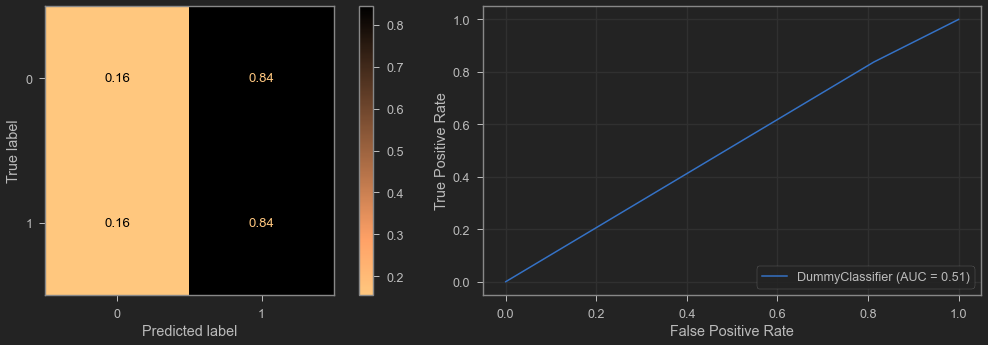

In [47]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
metrics.plot_confusion_matrix(base_model,
                              X_test_pr,
                              y_test_encoded,
                              cmap='copper_r',
                              normalize='true',
                              ax=ax[0])
plt.grid()
metrics.plot_roc_curve(base_model, X_test_pr, y_test_encoded, ax=ax[1])
plt.tight_layout()
plt.show()

### Logistic Regression

### Random Forest

#### OG data

******************************************************************************************
Train accuracy score: 1.0
Test accuracy score: 0.9595
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Train Report: 
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1280
           1       1.00      1.00      1.00      6821

    accuracy                           1.00      8101
   macro avg       1.00      1.00      1.00      8101
weighted avg       1.00      1.00      1.00      8101

************************************************************


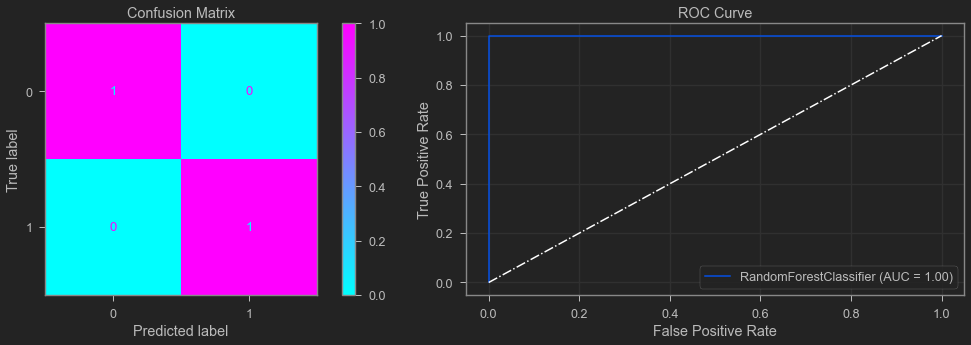

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       347
           1       0.96      0.99      0.98      1679

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.93      2026
weighted avg       0.96      0.96      0.96      2026

************************************************************


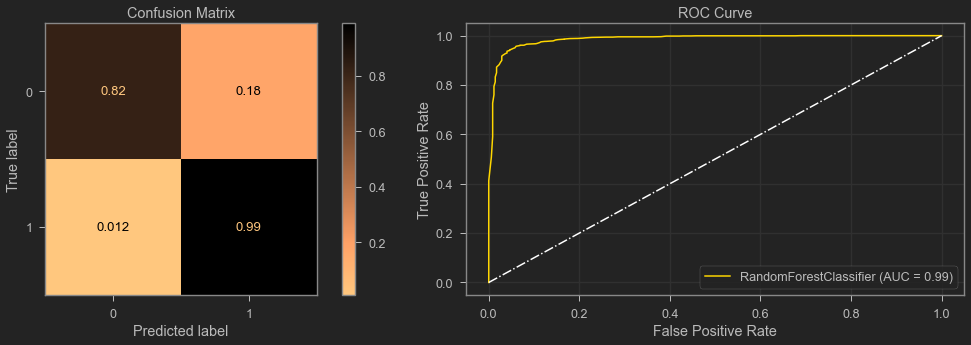

In [48]:
clf_rf = RandomForestClassifier(n_jobs=-1)

model_report(clf_rf, X_train_pr, y_train_encoded, X_test_pr, y_test_encoded)

#### OS data

******************************************************************************************
Train accuracy score: 1.0
Test accuracy score: 0.9205
    Possible Overfitting, diffrence of scores 7.95% crossed 5% thresh hold.
******************************************************************************************

Train Report: 
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6821
           1       1.00      1.00      1.00      6821

    accuracy                           1.00     13642
   macro avg       1.00      1.00      1.00     13642
weighted avg       1.00      1.00      1.00     13642

************************************************************


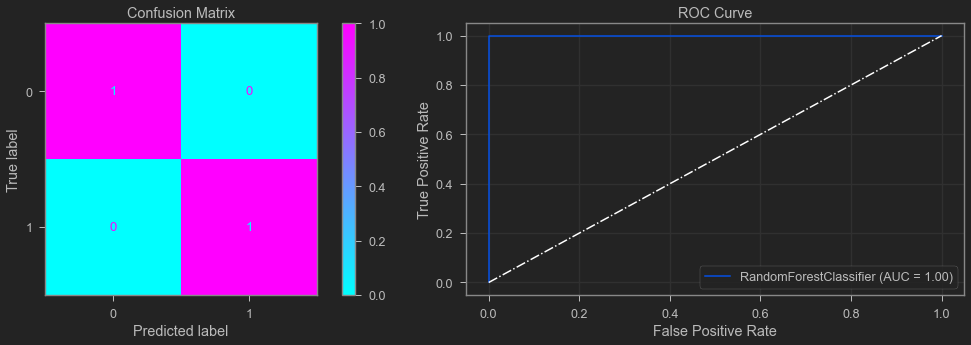

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.70      0.93      0.80       347
           1       0.98      0.92      0.95      1679

    accuracy                           0.92      2026
   macro avg       0.84      0.92      0.87      2026
weighted avg       0.94      0.92      0.92      2026

************************************************************


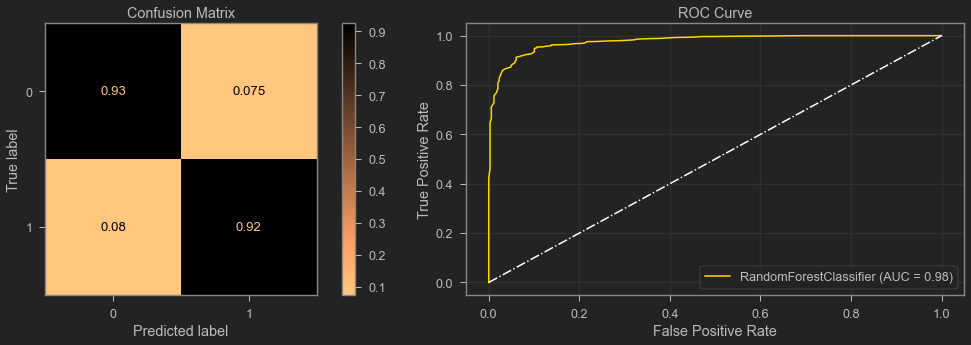

In [49]:
clf_rf = RandomForestClassifier(n_jobs=-1)
model_report(clf_rf, X_train_pr_os, y_train_encoded_os, X_test_pr, y_test_encoded)

#### Grid Search

In [50]:
rf_clf_gs = RandomForestClassifier(n_jobs=-1)
params = {
    'criterion': ["gini", "entropy"],
    'max_depth': [2, 3, 4, None],
    'min_samples_leaf': [1, 2, 3, 4],
    'class_weight': ["balanced", "balanced_subsample"]
}
gridsearch_rf_clf = GridSearchCV(estimator=rf_clf_gs,
                                 param_grid=params,
                                 n_jobs=-1,
                                 scoring='precision')
gridsearch_rf_clf

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, None],
                         'min_samples_leaf': [1, 2, 3, 4]},
             scoring='precision')

In [51]:
import warnings

In [52]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_rf_clf.fit(X_train_pr_os, y_train_encoded_os)
print(f"Best Parameters by gridsearch:\t{gridsearch_rf_clf.best_params_}")
print(f"Best Estimator by gridsearch:\t{gridsearch_rf_clf.best_estimator_}")

rf_clf_gs_best = gridsearch_rf_clf.best_estimator_

Best Parameters by gridsearch:	{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}
Best Estimator by gridsearch:	RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_jobs=-1)


******************************************************************************************
Train accuracy score: 1.0
Test accuracy score: 0.9072
    Possible Overfitting, diffrence of scores 9.28% crossed 5% thresh hold.
******************************************************************************************

Train Report: 
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6821
           1       1.00      1.00      1.00      6821

    accuracy                           1.00     13642
   macro avg       1.00      1.00      1.00     13642
weighted avg       1.00      1.00      1.00     13642

************************************************************


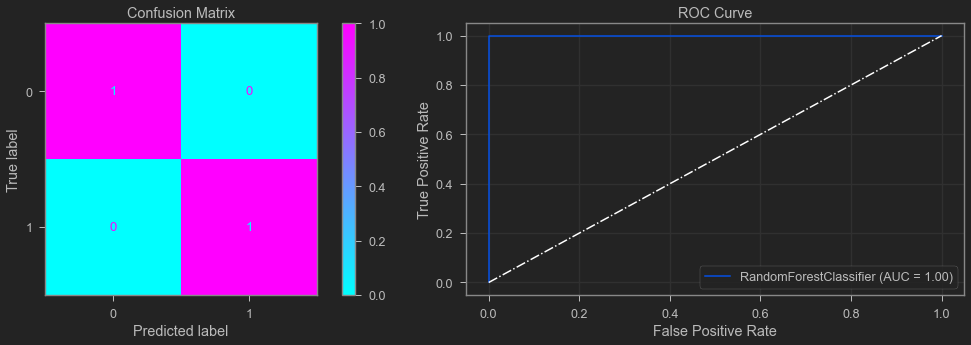

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.67      0.92      0.77       347
           1       0.98      0.90      0.94      1679

    accuracy                           0.91      2026
   macro avg       0.82      0.91      0.86      2026
weighted avg       0.93      0.91      0.91      2026

************************************************************


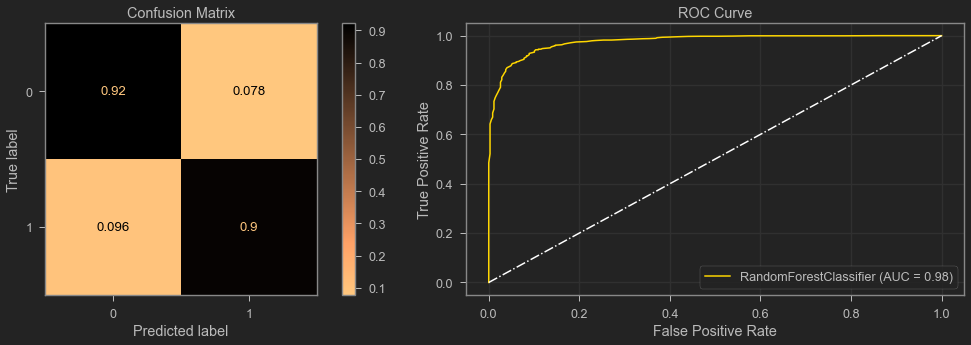

In [53]:
model_report(rf_clf_gs_best, X_train_pr_os, y_train_encoded_os, X_test_pr,
             y_test_encoded)

### XGBoost

******************************************************************************************
Train accuracy score: 1.0
Test accuracy score: 0.8317
    Possible Overfitting, diffrence of scores 16.83% crossed 5% thresh hold.
******************************************************************************************

Train Report: 
************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6821
           1       1.00      1.00      1.00      6821

    accuracy                           1.00     13642
   macro avg       1.00      1.00      1.00     13642
weighted avg       1.00      1.00      1.00     13642

************************************************************


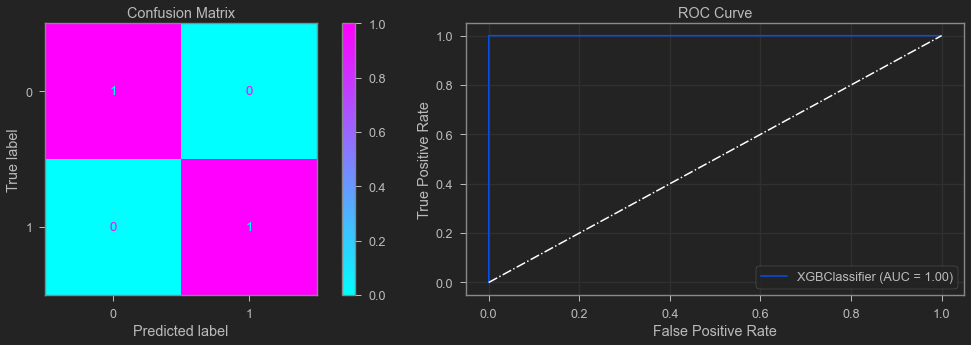

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.50      0.99      0.67       347
           1       1.00      0.80      0.89      1679

    accuracy                           0.83      2026
   macro avg       0.75      0.90      0.78      2026
weighted avg       0.91      0.83      0.85      2026

************************************************************


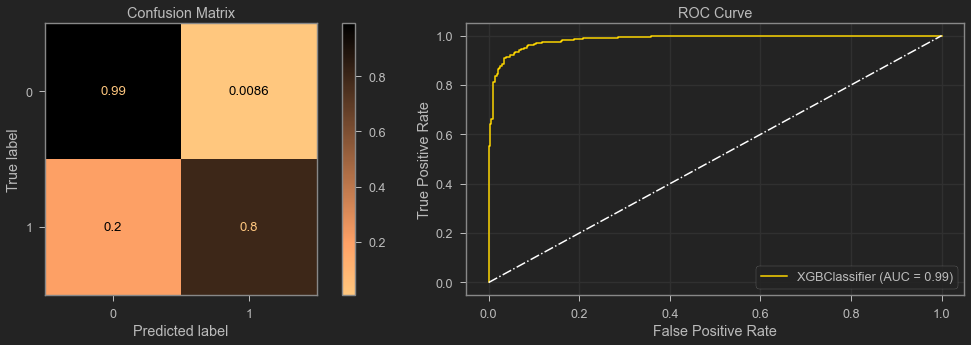

In [54]:
clf_xg = XGBClassifier(n_jobs=-1)
model_report(clf_xg, X_train_pr_os, y_train_encoded_os, X_test_pr, y_test_encoded)

******************************************************************************************
Train accuracy score: 0.9486
Test accuracy score: 0.8983
    Possible Overfitting, diffrence of scores 5.03% crossed 5% thresh hold.
******************************************************************************************

Train Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      6821
           1       0.95      0.95      0.95      6821

    accuracy                           0.95     13642
   macro avg       0.95      0.95      0.95     13642
weighted avg       0.95      0.95      0.95     13642

************************************************************


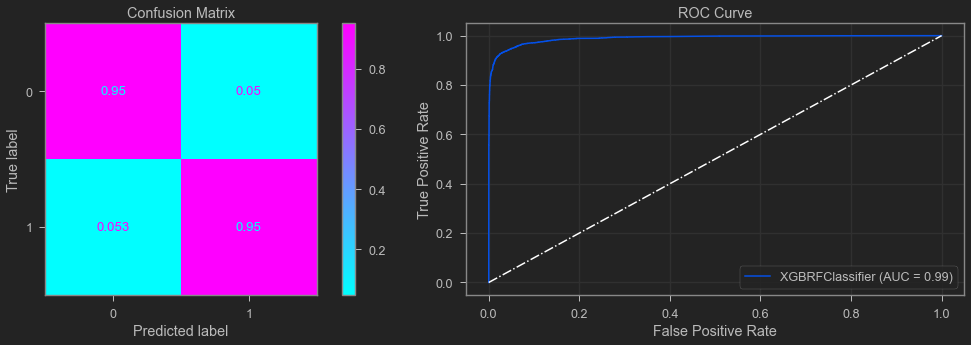

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.64      0.91      0.75       347
           1       0.98      0.90      0.94      1679

    accuracy                           0.90      2026
   macro avg       0.81      0.90      0.85      2026
weighted avg       0.92      0.90      0.90      2026

************************************************************


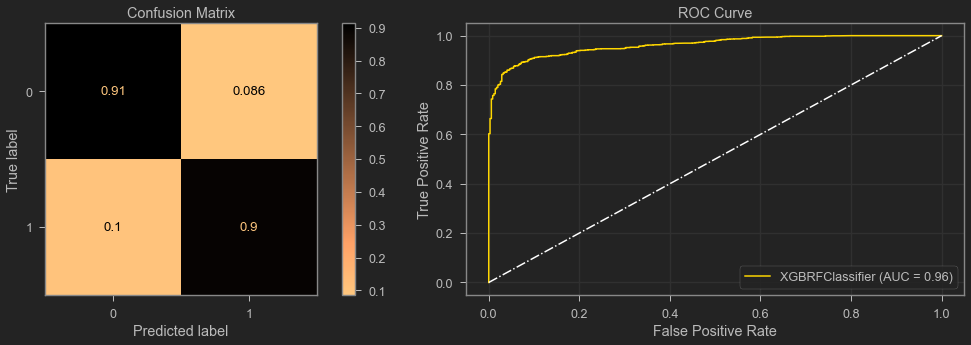

In [55]:
clf_xg = XGBRFClassifier(n_jobs=-1)
model_report(clf_xg, X_train_pr_os, y_train_encoded_os, X_test_pr, y_test_encoded)

### SVC

In [56]:
# clf_svc = SVC(kernel='linear', C=100, class_weight='balanced')
# clf_svc = SVC(kernel='rbf', C=1, gamma='auto', class_weight='balanced', tol=.8)
# clf_svc = SVC(kernel='poly', degree=8, C=1, gamma='scale', class_weight='balanced')
clf_svc = SVC(kernel='sigmoid', C=2, class_weight='balanced')

******************************************************************************************
Train accuracy score: 0.7678
Test accuracy score: 0.7453
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Train Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      6821
           1       0.77      0.77      0.77      6821

    accuracy                           0.77     13642
   macro avg       0.77      0.77      0.77     13642
weighted avg       0.77      0.77      0.77     13642

************************************************************


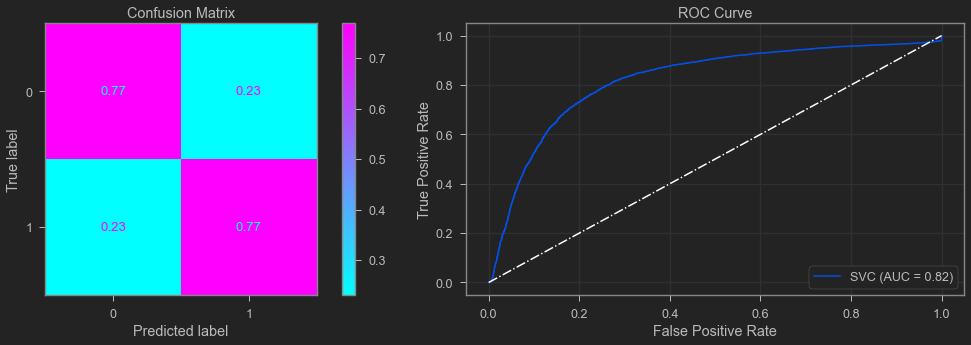

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.37      0.67      0.47       347
           1       0.92      0.76      0.83      1679

    accuracy                           0.75      2026
   macro avg       0.64      0.72      0.65      2026
weighted avg       0.82      0.75      0.77      2026

************************************************************


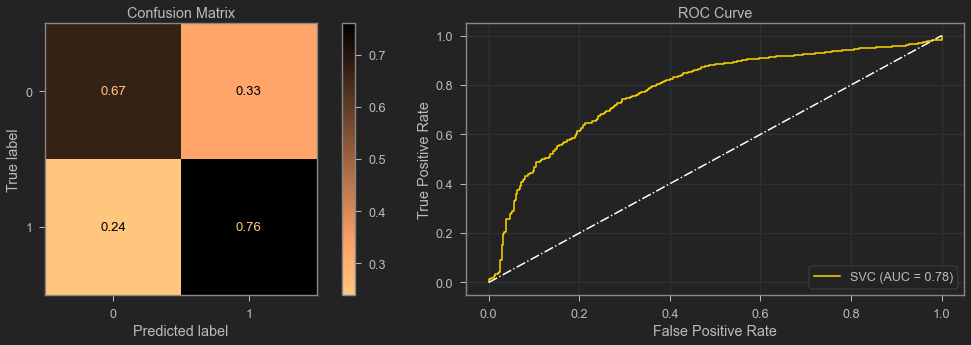

In [57]:
model_report(clf_svc, X_train_pr_os, y_train_encoded_os, X_test_pr, y_test_encoded)

## Segmentation

In [58]:
from sklearn.cluster import KMeans

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [60]:
seg_df = df.drop(columns='Attrition_Flag').copy()
seg_df.sample(5)

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7684,55,M,3,Uneducated,Single,Above_120K,Blue,48,5,2,2,3088.0,1743,1345.0,0.766,3906,68,0.659,0.564
7819,42,F,4,College,Single,40K_to_60K,Blue,36,3,1,2,2575.0,2136,439.0,0.722,5267,83,0.886,0.830
7616,43,F,5,Graduate,Single,Unknown,Blue,34,6,6,3,4607.0,2440,2167.0,0.646,4825,77,0.878,0.530
3648,41,F,3,High School,Single,Less_than_40K,Silver,36,6,1,3,11533.0,1418,10115.0,0.546,4038,63,0.615,0.123
7360,53,F,2,Graduate,Single,Less_than_40K,Blue,38,4,2,3,2375.0,1353,1022.0,0.804,5000,76,0.617,0.570


In [61]:
nume_col = seg_df.select_dtypes('number').columns.to_list()
cate_col = seg_df.select_dtypes('object').columns.to_list()

In [62]:
scaler = MinMaxScaler()
encoder = OrdinalEncoder()

In [63]:
# pipeline for processing categorical features
pipe_cate = Pipeline([('ord_en', encoder)])
# pipeline for processing numerical features
pipe_nume = Pipeline([('scaler', scaler)])
preprocessor = ColumnTransformer([('nume_feat', pipe_nume, nume_col),
                                  ('cate_feat', pipe_cate, cate_col)])

In [65]:
preprocessor.fit(seg_df)

ColumnTransformer(transformers=[('nume_feat',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Customer_Age', 'Dependent_count',
                                  'Months_on_book', 'Total_Relationship_Count',
                                  'Months_Inactive_12_mon',
                                  'Contacts_Count_12_mon', 'Credit_Limit',
                                  'Total_Revolving_Bal', 'Avg_Open_To_Buy',
                                  'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                                  'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
                                  'Avg_Utilization_Ratio']),
                                ('cate_feat',
                                 Pipeline(steps=[('ord_en', OrdinalEncoder())]),
                                 ['Gender', 'Education_Level', 'Marital_Status',
                                  'Income_Category', 'Card_Category'])])

In [66]:
seg_df_transformed = pd.DataFrame(preprocessor.transform(seg_df),
                                  columns=nume_col + cate_col)
seg_df_transformed

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,0.404255,0.6,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061,1.0,3.0,1.0,1.0,0.0
1,0.489362,1.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105,0.0,2.0,2.0,4.0,0.0
2,0.531915,0.6,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000,1.0,2.0,1.0,2.0,0.0
3,0.297872,0.8,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761,0.0,3.0,3.0,4.0,0.0
4,0.297872,0.6,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000,1.0,5.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.510638,0.4,0.627907,0.4,0.333333,0.500000,0.077536,0.735399,0.062266,0.206947,0.832647,0.829457,0.230749,0.462462,1.0,2.0,2.0,0.0,0.0
10123,0.319149,0.4,0.279070,0.6,0.333333,0.500000,0.085819,0.868494,0.060499,0.236679,0.459219,0.457364,0.183899,0.511512,1.0,6.0,0.0,0.0,0.0
10124,0.382979,0.2,0.534884,0.8,0.500000,0.666667,0.120042,0.000000,0.156637,0.241095,0.544175,0.387597,0.220248,0.000000,0.0,3.0,1.0,4.0,0.0
10125,0.085106,0.4,0.534884,0.6,0.500000,0.500000,0.116172,0.000000,0.152928,0.157492,0.438689,0.403101,0.194400,0.000000,1.0,2.0,3.0,0.0,0.0


In [67]:
seg_df_inv_transformed = pd.concat([
    pd.DataFrame(
        preprocessor.named_transformers_['nume_feat'].inverse_transform(
            seg_df_transformed[nume_col]),
        columns=nume_col),
    pd.DataFrame(
        preprocessor.named_transformers_['cate_feat'].inverse_transform(
            seg_df_transformed[cate_col]),
        columns=cate_col)
],
                                   axis=1)
seg_df_inv_transformed

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,45.0,3.0,39.0,5.0,1.0,3.0,12691.0,777.0,11914.0,1.335,1144.0,42.0,1.625,0.061,M,High School,Married,60K_to_80K,Blue
1,49.0,5.0,44.0,6.0,1.0,2.0,8256.0,864.0,7392.0,1.541,1291.0,33.0,3.714,0.105,F,Graduate,Single,Less_than_40K,Blue
2,51.0,3.0,36.0,4.0,1.0,0.0,3418.0,0.0,3418.0,2.594,1887.0,20.0,2.333,0.000,M,Graduate,Married,80K_to_120K,Blue
3,40.0,4.0,34.0,3.0,4.0,1.0,3313.0,2517.0,796.0,1.405,1171.0,20.0,2.333,0.760,F,High School,Unknown,Less_than_40K,Blue
4,40.0,3.0,21.0,5.0,1.0,0.0,4716.0,0.0,4716.0,2.175,816.0,28.0,2.500,0.000,M,Uneducated,Married,60K_to_80K,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50.0,2.0,40.0,3.0,2.0,3.0,4003.0,1851.0,2152.0,0.703,15476.0,117.0,0.857,0.462,M,Graduate,Single,40K_to_60K,Blue
10123,41.0,2.0,25.0,4.0,2.0,3.0,4277.0,2186.0,2091.0,0.804,8764.0,69.0,0.683,0.511,M,Unknown,Divorced,40K_to_60K,Blue
10124,44.0,1.0,36.0,5.0,3.0,4.0,5409.0,0.0,5409.0,0.819,10291.0,60.0,0.818,0.000,F,High School,Married,Less_than_40K,Blue
10125,30.0,2.0,36.0,4.0,3.0,3.0,5281.0,0.0,5281.0,0.535,8395.0,62.0,0.722,0.000,M,Graduate,Unknown,40K_to_60K,Blue


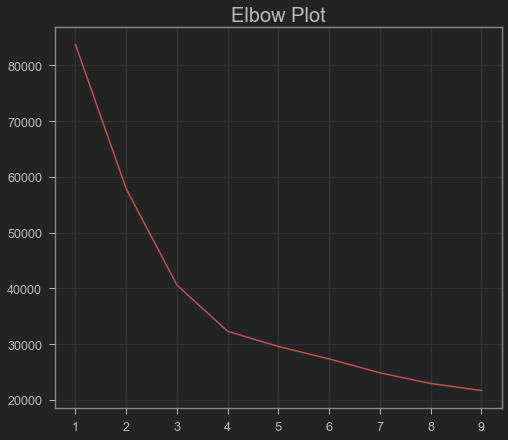

In [68]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(init='k-means++',algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(seg_df_transformed)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()), list(sse.values()), color='r')
plt.title(f'Elbow Plot', fontsize=20)
plt.grid()
plt.show()

In [69]:
# !pip install kmodes

In [70]:
from kmodes.kprototypes import KPrototypes

In [71]:
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=20)
kproto

KPrototypes(max_iter=20, n_clusters=4, verbose=2)

In [72]:
cat_idx = [
    seg_df_inv_transformed.columns.get_loc(i)
    for i in seg_df_inv_transformed.select_dtypes('object').columns
]
cat_idx

[14, 15, 16, 17, 18]

In [73]:
kproto.fit(seg_df_inv_transformed, categorical=cat_idx)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 2415, ncost: 231601757587.7852
Run: 1, iteration: 2/20, moves: 726, ncost: 212372947465.5771
Run: 1, iteration: 3/20, moves: 481, ncost: 206129687049.68466
Run: 1, iteration: 4/20, moves: 395, ncost: 202662590156.64178
Run: 1, iteration: 5/20, moves: 235, ncost: 201342282866.19025
Run: 1, iteration: 6/20, moves: 154, ncost: 200814056496.42282
Run: 1, iteration: 7/20, moves: 143, ncost: 200365772145.62073
Run: 1, iteration: 8/20, moves: 90, ncost: 200189274394.27133
Run: 1, iteration: 9/20, moves: 52, ncost: 200136406892.26236
Run: 1, iteration: 10/20, moves: 24, ncost: 200124192707.23312
Run: 1, iteration: 11/20, moves: 9, ncost: 200122843484.55887
Run: 1, iteration: 12/20, moves: 3, ncost: 200122673108.4274
Run: 1, iteration: 13/20, moves: 0, ncost: 200122673108.4274
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, move

Run: 9, iteration: 5/20, moves: 87, ncost: 223363932525.97986
Run: 9, iteration: 6/20, moves: 44, ncost: 223251380591.30142
Run: 9, iteration: 7/20, moves: 29, ncost: 223215353549.7266
Run: 9, iteration: 8/20, moves: 24, ncost: 223180738910.60568
Run: 9, iteration: 9/20, moves: 10, ncost: 223176688473.10797
Run: 9, iteration: 10/20, moves: 0, ncost: 223176688473.10797
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 10, iteration: 1/20, moves: 2116, ncost: 239431569357.49808
Run: 10, iteration: 2/20, moves: 347, ncost: 228528660921.59763
Run: 10, iteration: 3/20, moves: 317, ncost: 224752648716.2148
Run: 10, iteration: 4/20, moves: 163, ncost: 223638776491.3905
Run: 10, iteration: 5/20, moves: 88, ncost: 223312128020.97836
Run: 10, iteration: 6/20, moves: 50, ncost: 223229499232.09372
Run: 10, iteration: 7/20, moves: 25, ncost: 2232002508

KPrototypes(gamma=2293.0654804914857, max_iter=20, n_clusters=4, verbose=2)

In [74]:
print(kproto.cluster_centroids_)
clusters = kproto.predict(seg_df_inv_transformed, categorical=cat_idx)

[['46.36441079034548' '2.357311878845244' '36.09086606720303'
  '3.7468054898248937' '2.3279697113109323' '2.471367723615712'
  '9771.860388073828' '1151.329389493611' '8620.530998580218'
  '0.761922385234261' '4798.242782773308' '65.16327496450545'
  '0.7112375769048748' '0.12108234737340308' 'M' 'Graduate' 'Married'
  'Less_than_40K' 'Blue']
 ['46.30991337824832' '2.442733397497594' '35.973051010587106'
  '3.807507218479307' '2.327237728585178' '2.496631376323388'
  '19399.094321462944' '1141.4552454282964' '18257.639076034648'
  '0.7636188642925894' '4984.6621751684315' '66.52550529355149'
  '0.7108960538979812' '0.05924639076034637' 'M' 'Graduate' 'Married'
  '80K_to_120K' 'Blue']
 ['46.35952380952381' '2.6023809523809525' '36.02142857142857'
  '3.448809523809524' '2.301190476190476' '2.501190476190476'
  '32712.089285714286' '1189.1321428571428' '31522.957142857143'
  '0.7647583333333277' '5848.45' '70.25833333333334' '0.7071119047619051'
  '0.03637857142857153' 'M' 'Graduate' 'Si

In [75]:
clusters

array([0, 0, 3, ..., 3, 3, 0], dtype=uint16)

In [76]:
from sklearn.decomposition import PCA

In [88]:
pca = PCA(n_components=3)
pca_df = pca.fit_transform(seg_df_transformed)
pca_df

array([[ 0.09214898,  1.68103454, -0.43615231],
       [ 1.09766413, -1.43832669,  0.30726324],
       [ 1.09750399,  0.68855568, -0.47162132],
       ...,
       [ 0.10548825, -1.44730812, -0.44528027],
       [ 1.07481911,  2.65894123,  1.05988663],
       [ 1.11243451, -1.37147359,  1.30572638]])

In [89]:
pca.explained_variance_ratio_.cumsum()

array([0.40707449, 0.77111869, 0.83914604])

10127

In [78]:
plt.scatter(pca_df)

TypeError: scatter() missing 1 required positional argument: 'y'

In [240]:
# sse = {}
# for k in range(1,3):
#     print(f'Testing cluster size: {k}')
# #     cat_idx = [df.columns.get_loc(i) for i in df.select_dtypes('object').columns]
#     kproto = KPrototypes(n_clusters=k, verbose=0, max_iter=10)
#     kproto.fit(df, categorical=cat_idx)
# #     kproto.cluster_centroids_
#     sse[k] = kproto.cluster_centroids_
# plt.plot(list(sse.keys()), list(sse.values()), color='gold')
# plt.title(f'Elbow Plot', fontsize=20)
# plt.grid()
# plt.show()

In [241]:
# kproto.cluster_centroids_

In [242]:
# cluster_df = df.copy()
# cluster_df['cluster'] = 

# INTERPRET 

# RECOMMENDATION

# CONCLUSION

# NEXT STEPS

# APPENDIX